In [1]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_clients = 1500  # 500 clients per start year

# Define start years and generate dates
start_years = [2020, 2021, 2022]
clients_per_year = n_clients // len(start_years)

start_dates = []
for year in start_years:
    # Generate random dates within each year
    dates = [datetime(year, 1, 1) + timedelta(days=np.random.randint(0, 365)) 
            for _ in range(clients_per_year)]
    start_dates.extend(dates)

# Convert to numpy array
start_dates = np.array(start_dates)

# Generate time to churn (in days)
# More recent clients tend to churn faster
base_churn_time = np.random.exponential(scale=70, size=int(n_clients * 0.3) )
years_active = (datetime(2025, 3, 16) - start_dates).astype('timedelta64[D]').astype(int)
time_to_churn = base_churn_time * (1 + years_active * 0.001)

# Generate censoring indicator (1 = churned, 0 = still active)
# Older clients are more likely to be censored (survived longer)
censoring_prob = 0.4 - (years_active * 0.0002)
censored = np.random.binomial(n=1, p=censoring_prob, size=n_clients)

# Create DataFrame
df = pd.DataFrame({
    'start_date': start_dates,
    'start_year': [d.year for d in start_dates],
    'time_to_churn': time_to_churn,
    'churned': censored,
    'years_active': years_active / 365
})

ValueError: operands could not be broadcast together with shapes (450,) (1500,) 

In [2]:
# Plot Kaplan-Meier curves for different start years

kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

for year in start_years:
    mask = df['start_year'] == year
    kmf.fit(
        durations=df.loc[mask, 'time_to_churn'],
        event_observed=df.loc[mask, 'churned'],
        label=f'Start year {year}'
    )
    kmf.plot()

plt.title('Kaplan-Meier Survival Curves by Start Year')
plt.xlabel('Time (days)')
plt.ylabel('Survival probability')
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n_customers = 3000

# Create start dates between 2019-2021
start_years = np.random.choice([2019, 2020, 2021], size=n_customers)

# Generate survival times (in days) with different distributions per year
survival_times = []
for year in start_years:
    if year == 2019:
        # Longer retention for older customers
        times = np.random.weibull(1.5, 1) * 1000
    elif year == 2020:
        # Medium retention
        times = np.random.weibull(1.2, 1) * 1000
    else:  # 2021
        # Shorter observation period
        times = np.random.weibull(1.0, 1) * 1000
    survival_times.extend(times)

# Generate censoring indicators (1 = churned, 0 = censored)
censoring = np.random.binomial(n=1, p=0.7, size=n_customers)

# Create DataFrame
df = pd.DataFrame({
    'start_year': start_years,
    'time': survival_times,
    'event': censoring
})


df

,start_year,time,event
0,2021,331.546294,1
1,2019,451.532692,1
2,2021,283.661896,1
3,2021,2367.172474,0
4,2019,435.176855,1
...,...,...,...
2995,2021,70.895440,1
2996,2019,1730.725478,1
2997,2019,252.832290,1
2998,2020,463.338637,1


array([[<Axes: title={'center': '0'}>]], dtype=object)

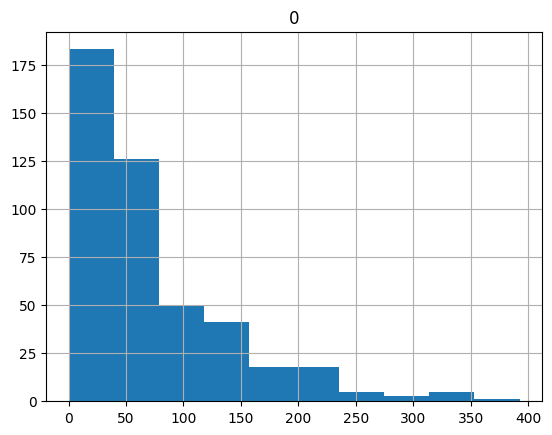

In [ ]:
pd.DataFrame(base_churn_time).hist()

In [1]:
censoring = np.random.binomial(n=1, p=0.7, size=1000)

NameError: name 'np' is not defined